In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import keras
import pandas as pd
import numpy as np

from keras.regularizers import l2

df = pd.read_csv("content/combined_data_all_list_encoded_10.csv")

y = df["weighted_average_vote"].astype(float)
X = df.drop(
    ["weighted_average_vote"],
    axis=1,
).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dim = X.shape[1]

batch = 512

# define the keras model
model = Sequential()

model.add(Dense(dim*2, input_dim=dim, activation="relu"))

model.add(Dense(dim, activation="sigmoid",kernel_regularizer=l2(0.01)))

model.add(Dense(50, activation="tanh"))

model.add(Dense(1, activation="relu"))

model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=batch)


yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)


print("MAE: %.3f" % error)
                                

Epoch 1/20
22/22 [==============================] - 0s 8ms/step - loss: 9.6496 - mse: 7.1132 - mae: 1.9717 - val_loss: 4.5997 - val_mse: 2.1118 - val_mae: 1.1060
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 3.8673 - mse: 1.4644 - mae: 0.9277 - val_loss: 3.5683 - val_mse: 1.2831 - val_mae: 0.9056
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 3.3950 - mse: 1.2280 - mae: 0.8660 - val_loss: 3.1710 - val_mse: 1.1407 - val_mae: 0.8182
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 3.0352 - mse: 1.1209 - mae: 0.8133 - val_loss: 2.8399 - val_mse: 1.0554 - val_mae: 0.7971
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 2.7174 - mse: 1.0381 - mae: 0.7858 - val_loss: 2.5586 - val_mse: 0.9958 - val_mae: 0.7698
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 2.4521 - mse: 0.9835 - mae: 0.7620 - val_loss: 2.3342 - val_mse: 0.9695 - val_mae: 0.7615
Epoch 7/20
22/22 [==========

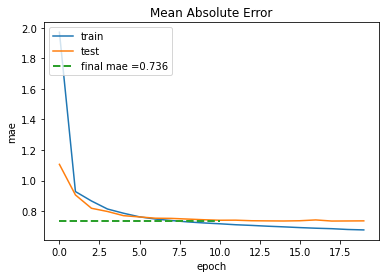

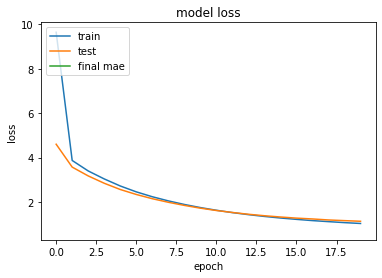

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.plot([0, 10], [error, error], '--', lw=2)
plt.title('Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'final mae =%.3f'%error], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(error)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'final mae'], loc='upper left')
plt.show()